In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset to understand its structure
data_head = data.head()
data_summary = data.describe(include='all')

data_head, data_summary


(    Area  BHK  Bathroom      Furnishing  \
 0  800.0    3       2.0  Semi-Furnished   
 1  750.0    2       2.0  Semi-Furnished   
 2  950.0    2       2.0       Furnished   
 3  600.0    2       2.0  Semi-Furnished   
 4  650.0    2       2.0  Semi-Furnished   
 
                                             Locality  Parking     Price  \
 0                                   Rohini Sector 25      1.0   6500000   
 1             J R Designers Floors, Rohini Sector 24      1.0   5000000   
 2                Citizen Apartment, Rohini Sector 13      1.0  15500000   
 3                                   Rohini Sector 24      1.0   4200000   
 4  Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   
 
           Status   Transaction           Type  Per_Sqft  
 0  Ready_to_move  New_Property  Builder_Floor       NaN  
 1  Ready_to_move  New_Property      Apartment    6667.0  
 2  Ready_to_move        Resale      Apartment    6667.0  
 3  Ready_to_move        Resale  Builder

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Drop rows with missing target values (Price)
data = data.dropna(subset=['Price'])

# Handling missing values by filling them with the median for numerical columns
numerical_cols = ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# For categorical columns, fill missing values with the most frequent value
categorical_cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define the features and target
X = data.drop(columns=['Price'])
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(10239991.123086073, 0.5915433523760101)

In [3]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Initialize the models with default alpha (regularization strength) values
ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()

# Train the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

# Make predictions
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

# Evaluate the models
ridge_mae = mean_absolute_error(y_test, ridge_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
elasticnet_mae = mean_absolute_error(y_test, elasticnet_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)

ridge_mae, ridge_r2, lasso_mae, lasso_r2, elasticnet_mae, elasticnet_r2


(10235163.406827208,
 0.5916071707430817,
 10239990.960245699,
 0.5915433428996106,
 9801221.244515551,
 0.5820963071446204)

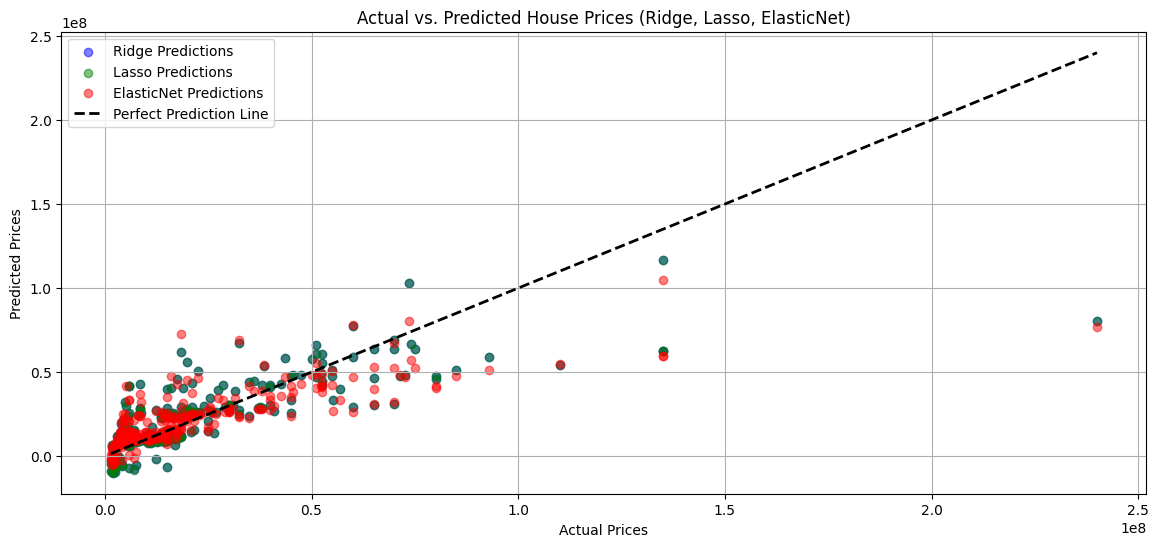

In [4]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices for each model
plt.figure(figsize=(14, 6))

plt.scatter(y_test, ridge_pred, color='blue', alpha=0.5, label='Ridge Predictions')
plt.scatter(y_test, lasso_pred, color='green', alpha=0.5, label='Lasso Predictions')
plt.scatter(y_test, elasticnet_pred, color='red', alpha=0.5, label='ElasticNet Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices (Ridge, Lasso, ElasticNet)')
plt.legend()
plt.grid(True)
plt.show()
